In [1]:
import pandas as pd
import os
import json
import requests
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
combined_data_csv = os.path.join("..", "data", "cleandata", "coll_n_weather_chris_stan_date_left_merge.csv")

csv = pd.read_csv(combined_data_csv, low_memory=False)

In [3]:
combined_data_df = pd.DataFrame(csv)
combined_data_df.head()

,DATE,UNIX DATE,HOUR,DAY,MONTH,YEAR,BOROUGH,DEATHS,INJURIES,ZIP CODE,...,precipProbability,pressure,temperatureMax,temperatureMaxTime,temperatureMin,temperatureMinTime,visibility,windGust,windGustTime,windSpeed
0,2018-12-30,1546171200,12,Sunday,12,2018,NaN,0.0,0,NaN,...,0.0,1023.42,38.91,1546146000,34.20,1546228800,9.87,5.93,1546149600,0.73
1,2018-12-30,1546171200,12,Sunday,12,2018,NaN,0.0,0,NaN,...,0.0,1023.42,38.91,1546146000,34.20,1546228800,9.87,5.93,1546149600,0.73
2,2018-12-28,1545955200,0,Friday,12,2018,NaN,0.0,0,NaN,...,1.0,1018.77,57.26,1546041600,42.23,1545973200,5.25,9.29,1546016400,3.85
3,2018-12-17,1545065100,16,Monday,12,2018,NaN,0.0,0,NaN,...,0.0,1007.31,45.88,1545066000,38.11,1545026400,10.00,16.37,1545080400,8.54
4,2018-12-11,1544533200,13,Tuesday,12,2018,NaN,0.0,0,NaN,...,0.0,1018.65,40.08,1544558400,25.13,1544526000,10.00,7.32,1544580000,1.49


In [4]:
len(combined_data_df)

1116399

In [86]:
combined_data_df['DATE'][1116398]

'2013-12-31'

In [87]:
combined_data_df.columns

Index(['DATE', 'UNIX DATE', 'HOUR', 'DAY', 'MONTH', 'YEAR', 'BOROUGH',
       'DEATHS', 'INJURIES', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION',
       'Day', 'Detail', 'Moonphase', 'Summary', 'Sunrise', 'Sunset',
       'cloudCover', 'dewPoint', 'humidity', 'precipIntensity',
       'precipIntensityMax', 'precipProbability', 'pressure', 'temperatureMax',
       'temperatureMaxTime', 'temperatureMin', 'temperatureMinTime',
       'visibility', 'windGust', 'windGustTime', 'windSpeed'],
      dtype='object')

In [91]:
combined_data_df['DATE'] = combined_data_df['DATE'].astype(np.datetime64)
combined_data_df.dtypes

DATE                  datetime64[ns]
UNIX DATE                      int64
HOUR                           int64
DAY                           object
MONTH                          int64
YEAR                           int64
BOROUGH                       object
DEATHS                       float64
INJURIES                       int64
ZIP CODE                      object
LATITUDE                     float64
LONGITUDE                    float64
LOCATION                      object
Day                            int64
Detail                        object
Moonphase                    float64
Summary                       object
Sunrise                        int64
Sunset                         int64
cloudCover                   float64
dewPoint                     float64
humidity                     float64
precipIntensity              float64
precipIntensityMax           float64
precipProbability            float64
pressure                     float64
temperatureMax               float64
t

In [92]:
combined_data_df=combined_data_df.sort_values('DATE', ascending=True)
combined_data_df.head(2)

,DATE,UNIX DATE,HOUR,DAY,MONTH,YEAR,BOROUGH,DEATHS,INJURIES,ZIP CODE,...,precipProbability,pressure,temperatureMax,temperatureMaxTime,temperatureMin,temperatureMinTime,visibility,windGust,windGustTime,windSpeed
1116398,2013-12-31,1388483880,9,Tuesday,12,2013,BROOKLYN,0.0,0,11219,...,0.0,1021.22,31.36,1388520000,20.95,1388491200,9.97,15.22,1388534400,2.76
1116081,2013-12-31,1388499660,14,Tuesday,12,2013,NaN,0.0,1,NaN,...,0.0,1021.22,31.36,1388520000,20.95,1388491200,9.97,15.22,1388534400,2.76


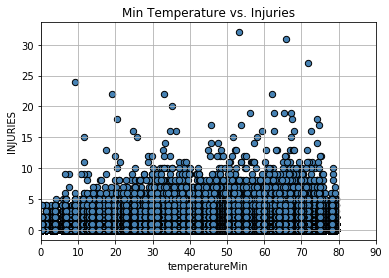

In [93]:
combined_data_df.plot.scatter('temperatureMin',
                              'INJURIES', 
                              title=(f'Min Temperature vs. Injuries'), 
                              marker='o', 
                              s=40, 
                              xlim=[0, 90],
                              color='SteelBlue', 
                              edgecolor='black', 
                              grid=True)

In [97]:
combined_data_df['Collisions'] = np.arange(len(combined_data_df))
combined_data_df.head(2)

,DATE,UNIX DATE,HOUR,DAY,MONTH,YEAR,BOROUGH,DEATHS,INJURIES,ZIP CODE,...,pressure,temperatureMax,temperatureMaxTime,temperatureMin,temperatureMinTime,visibility,windGust,windGustTime,windSpeed,Collisions
1116398,2013-12-31,1388483880,9,Tuesday,12,2013,BROOKLYN,0.0,0,11219,...,1021.22,31.36,1388520000,20.95,1388491200,9.97,15.22,1388534400,2.76,0
1116081,2013-12-31,1388499660,14,Tuesday,12,2013,NaN,0.0,1,NaN,...,1021.22,31.36,1388520000,20.95,1388491200,9.97,15.22,1388534400,2.76,1


In [98]:
combined_data_df.columns

Index(['DATE', 'UNIX DATE', 'HOUR', 'DAY', 'MONTH', 'YEAR', 'BOROUGH',
       'DEATHS', 'INJURIES', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION',
       'Day', 'Detail', 'Moonphase', 'Summary', 'Sunrise', 'Sunset',
       'cloudCover', 'dewPoint', 'humidity', 'precipIntensity',
       'precipIntensityMax', 'precipProbability', 'pressure', 'temperatureMax',
       'temperatureMaxTime', 'temperatureMin', 'temperatureMinTime',
       'visibility', 'windGust', 'windGustTime', 'windSpeed', 'Collisions'],
      dtype='object')

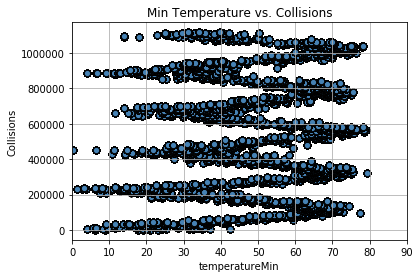

In [99]:
combined_data_df.plot.scatter('temperatureMin',
                              'Collisions', 
                              title=(f'Min Temperature vs. Collisions'), 
                              marker='o', 
                              s=40, 
                              xlim=[0, 90],
                              color='SteelBlue', 
                              edgecolor='black', 
                              grid=True)

In [100]:
grouped_by_date_df = combined_data_df.groupby('DATE')

In [101]:
grouped_by_date_df.count().head(2)

,UNIX DATE,HOUR,DAY,MONTH,YEAR,BOROUGH,DEATHS,INJURIES,ZIP CODE,LATITUDE,...,pressure,temperatureMax,temperatureMaxTime,temperatureMin,temperatureMinTime,visibility,windGust,windGustTime,windSpeed,Collisions
DATE,,,,,,,,,,,,,,,,,,,,,
2013-12-31,464,464,464,464,464,370,464,464,370,396,...,464,464,464,464,464,464,464,464,464,464
2014-01-01,399,399,399,399,399,311,399,399,311,341,...,399,399,399,399,399,399,399,399,399,399


In [102]:
total_collisions = pd.DataFrame(grouped_by_date_df['Collisions'].count())
total_collisions.head(2)

,Collisions
DATE,
2013-12-31,464
2014-01-01,399


In [119]:
total_injuries = pd.DataFrame(grouped_by_date_df['INJURIES'].sum())
total_injuries.head(2)

,INJURIES
DATE,
2013-12-31,122
2014-01-01,165


In [126]:
collisions_and_injuries = pd.merge(total_collisions, total_injuries, on="DATE")
collisions_and_injuries.head(2)

,DATE,Collisions,INJURIES
0,2013-12-31,464,122
1,2014-01-01,399,165


In [130]:
min_temperature = pd.DataFrame(grouped_by_date_df['temperatureMin'].mean())
min_temperature.head(2)

,temperatureMin
DATE,
2013-12-31,20.95
2014-01-01,23.02


In [132]:
collisions_and_injuries_and_min_temp = pd.merge(collisions_and_injuries, min_temperature, on="DATE")
collisions_and_injuries_and_min_temp.head(2)

,DATE,Collisions,INJURIES,temperatureMin
0,2013-12-31,464,122,20.95
1,2014-01-01,399,165,23.02


In [133]:
collisions_and_injuries_and_min_temp.dtypes

DATE              datetime64[ns]
Collisions                 int64
INJURIES                   int64
temperatureMin           float64
dtype: object

In [136]:
collisions_and_injuries_and_min_temp = collisions_and_injuries_and_min_temp.sort_values('DATE', ascending=True)
collisions_and_injuries_and_min_temp.head(2)

,DATE,Collisions,INJURIES,temperatureMin
0,2013-12-31,464,122,20.95
1,2014-01-01,399,165,23.02


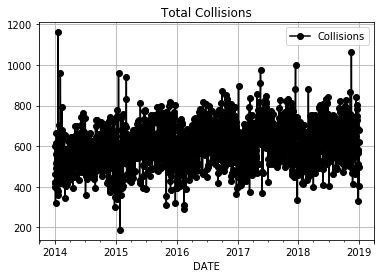

In [139]:
collisions_and_injuries_and_min_temp.plot.line('DATE', 'Collisions',color='Black',grid=True,marker='o',title=(f'Total Collisions'))

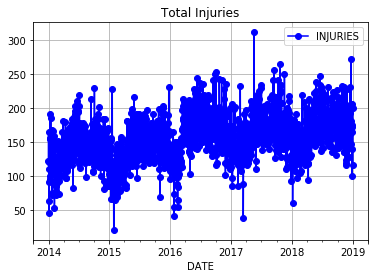

In [140]:
collisions_and_injuries_and_min_temp.plot.line('DATE', 'INJURIES',color='Blue',grid=True,marker='o',title=(f'Total Injuries'))

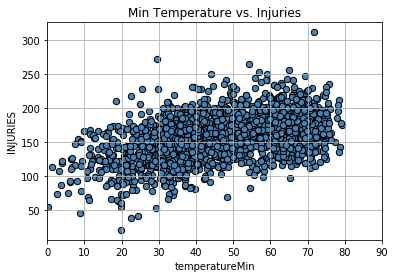

In [141]:
collisions_and_injuries_and_min_temp.plot.scatter('temperatureMin',
                              'INJURIES', 
                              title=(f'Min Temperature vs. Injuries'), 
                              marker='o', 
                              s=40, 
                              xlim=[0, 90],
                              color='SteelBlue', 
                              edgecolor='black', 
                              grid=True)

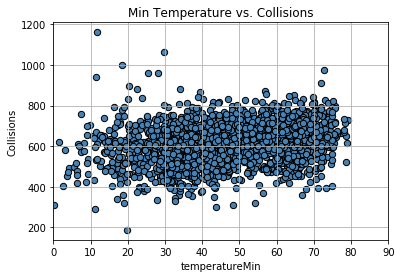

In [142]:
collisions_and_injuries_and_min_temp.plot.scatter('temperatureMin',
                              'Collisions', 
                              title=(f'Min Temperature vs. Collisions'), 
                              marker='o', 
                              s=40, 
                              xlim=[0, 90],
                              color='SteelBlue', 
                              edgecolor='black', 
                              grid=True)

## If using matplotlib:

In [38]:
# import matplotlib.pyplot as plt
# import numpy as np
# import matplotlib.dates as dates
# %matplotlib inline

In [159]:
from scipy.stats import linregress
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [160]:
collisions_and_injuries_and_min_temp.columns

Index(['DATE', 'Collisions', 'INJURIES', 'temperatureMin'], dtype='object')

In [161]:
x = collisions_and_injuries_and_min_temp['temperatureMin']
y = collisions_and_injuries_and_min_temp['INJURIES']
z = collisions_and_injuries_and_min_temp['Collisions']

In [168]:
(slope, intercept, _, _, _) = linregress(x, y)
fit = slope * x + intercept

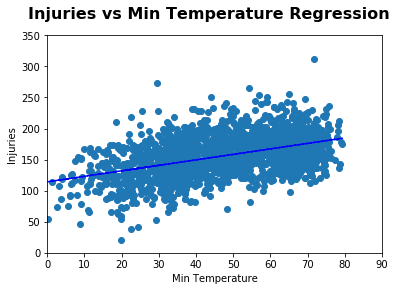

In [169]:
fig, ax = plt.subplots()

fig.suptitle("Injuries vs Min Temperature Regression", fontsize=16, fontweight="bold")

ax.set_xlim(0, 90)
ax.set_ylim(0, 350)

ax.set_xlabel("Min Temperature")
ax.set_ylabel("Injuries")

ax.plot(x, y, linewidth=0, marker='o')
ax.plot(x, fit, 'b--')

plt.show()

In [153]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [155]:
print("r-squared:", r_value**2)

r-squared: 0.20807873410395397


In [157]:
print("p value:", p_value)

p value: 1.440672428359801e-94


In [170]:
print("Standard Error:", std_err)

Standard Error: 0.040369313274728855


In [171]:
(slope, intercept, _, _, _) = linregress(x, z)
fit = slope * x + intercept

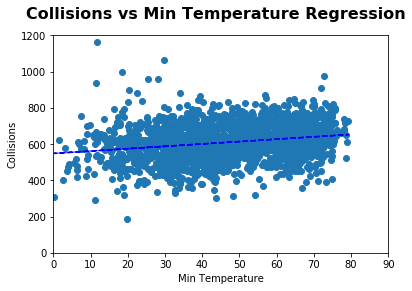

In [173]:
fig, ax = plt.subplots()

fig.suptitle("Collisions vs Min Temperature Regression", fontsize=16, fontweight="bold")

ax.set_xlim(0, 90)
ax.set_ylim(0, 1200)

ax.set_xlabel("Min Temperature")
ax.set_ylabel("Collisions")

ax.plot(x, z, linewidth=0, marker='o')
ax.plot(x, fit, 'b--')

plt.show()

In [174]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,z)

In [179]:
print("r-squared:", r_value**2)

r-squared: 0.04877463454749068


In [176]:
print("p value:", p_value)

p value: 1.2771941929009588e-21


In [177]:
print("Standard Error:", std_err)

Standard Error: 0.1356341502200705
